Kernel PCA

Importing the libraries and generating input data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

Computation of the kernel (similarity) matrix.

In [3]:
def rbf_kernel_matrix(X, gamma=15):
    sq_dists = np.sum(X**2, axis=1).reshape(-1, 1)
    sq_dists = sq_dists + sq_dists.T - 2 * np.dot(X, X.T)
    K = np.exp(-gamma * sq_dists)
    return K
K = rbf_kernel_matrix(X)

Eigendecomposition/centering of the kernel matrix.

In [4]:
N = K.shape[0]
one_n = np.ones((N, N)) / N
K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

Performing eigen decomposition

In [5]:
eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

Sorting the eigen vectors on the basis of eigen values in decreasing order

In [6]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

Selecting the top k eigen vectors (k=2 in this given case)

In [7]:
k = 2
principal_components = sorted_eigenvectors[:, :k]
lambdas = sorted_eigenvalues[:k]


Projecting the input data (X) onto the principal components

In [8]:
X_kpca = principal_components * np.sqrt(lambdas)

Plotting the original and transformed data side by side

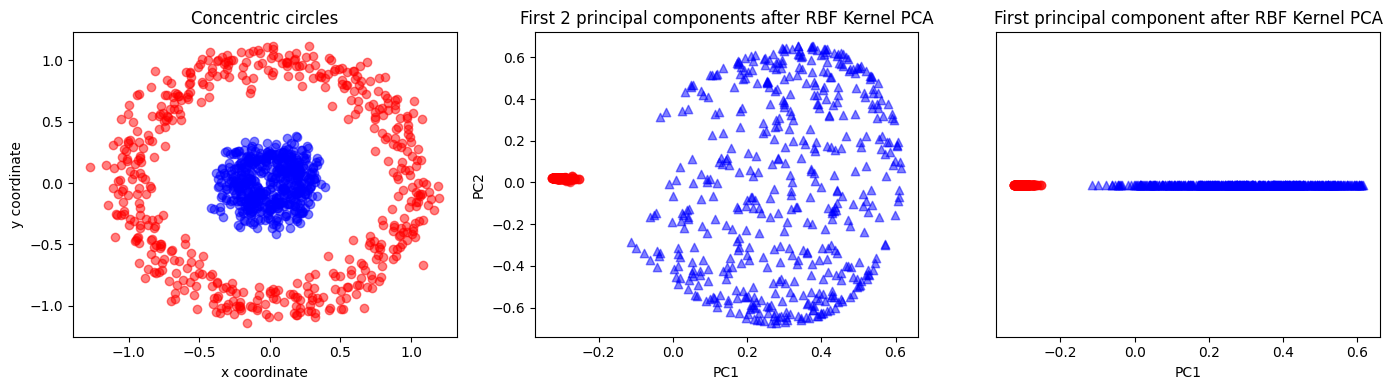

In [9]:
plt.figure(figsize=(14, 4))

# Original Data
plt.subplot(1, 3, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')


# Kernel PCA Transformed Data projected against both the principal component
plt.subplot(1, 3, 2)
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
            color='red', marker='o', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='^', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Kernel PCA Transformed Data projjected to the First principal component
plt.subplot(1, 3, 3)
plt.scatter(X_kpca[y==0, 0], np.zeros((500, 1)),
            color='red', marker='o', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], np.zeros((500, 1)),
            color='blue', marker='^', alpha=0.5)

plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.yticks([])

plt.tight_layout()
plt.show()

Plotting